In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sketch
from datetime import datetime

In [3]:
df=pd.read_csv(r'C:\\Users\\HP\Downloads\rfm_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [4]:
df.head()


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [5]:
df.sketch.ask('can you give me a friendly names and single sentence descriptions of each column ?(format output as HTML List)')

Objectives is to carry out RFM Analysis(RECENCY FREQUENT MONEYTARYVALUES) is useful for understanding and segmenting clients based on their purchasing behavior, particularly in the marketing arena.

Recency is know as the date of their most recent purchase
Frequency the frequency which they make purchases
while monetary value amount spent on items.

In [6]:
#converting The date columns to proper format
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 47.0+ KB


In [8]:
#getting our receny Purchase

df['Recency'] = (datetime.now().date() - df['PurchaseDate'].dt.date).dt.days

In [9]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,101
1,2188,2023-04-11,463.70,Product A,176819,London,101
2,4608,2023-04-11,80.28,Product A,340062,New York,101
3,2559,2023-04-11,221.29,Product A,239145,London,101
4,9482,2023-04-11,739.56,Product A,194545,Paris,101


In [10]:
df['Recency'].unique()

array([101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,
        88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,
        75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,
        62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,
        49,  48,  47,  46,  45,  44,  43,  42,  41], dtype=int64)

In [11]:
df['Recency'].describe()

count    1000.000000
mean       71.689000
std        17.323579
min        41.000000
25%        56.000000
50%        73.000000
75%        86.000000
max       101.000000
Name: Recency, dtype: float64

The lowest day is Day 42

In [12]:
df['Recency'].value_counts().sort_values(ascending=True)[:10].to_frame().reset_index().rename(columns={'index':'Days','Recency':'Recent_Count'})

,Days,Recent_Count
0,70,7
1,92,8
2,101,8
3,64,9
4,61,9
5,43,9
6,45,10
7,68,10
8,67,10
9,50,10


In [13]:
#getting our Frequency

freq_df = df.groupby('CustomerID')['OrderID'].count().reset_index()

In [14]:
freq_df.rename(columns={'OrderID': 'Frequency'}, inplace=True)

In [15]:
df= df.merge(freq_df, on='CustomerID', how='left')

In [16]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,101,1
1,2188,2023-04-11,463.70,Product A,176819,London,101,1
2,4608,2023-04-11,80.28,Product A,340062,New York,101,1
3,2559,2023-04-11,221.29,Product A,239145,London,101,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,101,1


In [17]:
# Calculate Monetary Value

money_df = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()

In [18]:
money_df.rename(columns={'TransactionAmount':'Moneytaryvalue'},inplace=True)

In [19]:
df=df.merge(money_df,on='CustomerID',how='left')

df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Moneytaryvalue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,101,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,101,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,101,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,101,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,101,1,739.56


In [20]:
df['Recency'].unique()

array([101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,
        88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,
        75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,
        62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,
        49,  48,  47,  46,  45,  44,  43,  42,  41], dtype=int64)

In [22]:
#Defining The criteriat


def criteriat(X):
    if X >= 100:
        return 1
    elif X >=80 and X < 100:
        return 2
    elif X >=50 and X < 80:
        return 3
    elif X >= 40 and X < 50:
        return 4
    elif X >= 20 and X < 40:
        return 5
    else:
        return 0

In [23]:
#applying the cateriat

df['Recency_Score']=df['Recency'].apply(criteriat)

Note:
    
    Range 1 custumers are custumers that their last seen is 100days.
    Range 2 custumers are custumers that their last seen is within 80 -99 days
    Range 3 custumers are custumers that their last seen is within 50 -79 days
    Range 4 custumers are custumers that their last seen is within 40 -49 days
    while Range 5 are custumers that their last seen is within 20 -29 days.

In [24]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Moneytaryvalue,Recency_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,101,1,943.31,1
1,2188,2023-04-11,463.70,Product A,176819,London,101,1,463.70,1
2,4608,2023-04-11,80.28,Product A,340062,New York,101,1,80.28,1
3,2559,2023-04-11,221.29,Product A,239145,London,101,1,221.29,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,101,1,739.56,1


In [25]:
df['Frequency'].unique()

array([1, 2, 3], dtype=int64)

In [28]:
df.query('Recency_Score==1')

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Moneytaryvalue,Recency_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,101,1,943.31,1
1,2188,2023-04-11,463.70,Product A,176819,London,101,1,463.70,1
2,4608,2023-04-11,80.28,Product A,340062,New York,101,1,80.28,1
3,2559,2023-04-11,221.29,Product A,239145,London,101,1,221.29,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,101,1,739.56,1
5,8483,2023-04-11,375.23,Product C,691194,Paris,101,1,375.23,1
6,8317,2023-04-11,272.56,Product B,826847,New York,101,2,974.88,1
7,6911,2023-04-11,433.33,Product C,963918,Tokyo,101,1,433.33,1
8,8993,2023-04-12,16.55,Product D,112426,New York,100,1,16.55,1
9,3519,2023-04-12,464.63,Product C,139726,New York,100,1,464.63,1


In [33]:
df.groupby('CustomerID')['OrderID'].count().sort_values(ascending=False)[:10]

CustomerID
5557    3
7363    3
4804    3
1011    2
2133    2
7971    2
3262    2
8216    2
8317    2
2741    2
Name: OrderID, dtype: int64

In [34]:
def freq(X):
    if X >= 3:
        return 'Champion'
    elif X >=2 and X < 3:
        return 'Loyalist'
    elif X >=1 and X < 2:
        return 'Regular'
    else :
        return 0
         

In [35]:
df['Freq_Score']=df['Frequency'].apply(freq)

Frequent Patronage :
    
    The custumer catgorize under Champion are custumer .
    The custumer categorize under Loyalist are custumer.
    Theh custumer categorize under Regular are custumer.

In [36]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Moneytaryvalue,Recency_Score,Freq_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,101,1,943.31,1,Regular
1,2188,2023-04-11,463.70,Product A,176819,London,101,1,463.70,1,Regular
2,4608,2023-04-11,80.28,Product A,340062,New York,101,1,80.28,1,Regular
3,2559,2023-04-11,221.29,Product A,239145,London,101,1,221.29,1,Regular
4,9482,2023-04-11,739.56,Product A,194545,Paris,101,1,739.56,1,Regular


In [37]:
df['TransactionAmount'].unique()

array([943.31, 463.7 ,  80.28, 221.29, 739.56, 375.23, 272.56, 433.33,
        16.55, 464.63, 120.75, 865.98, 392.7 , 623.35,  99.15, 978.17,
       299.57, 744.13, 388.9 , 102.76, 338.56, 132.99, 751.53, 637.78,
       692.36, 997.19, 417.64,  13.51, 849.53, 621.28, 585.27, 134.98,
       974.55, 786.12, 693.38, 575.3 , 226.63, 117.32, 711.7 , 924.97,
       793.2 , 461.88, 922.06, 897.91, 664.65, 812.08, 566.9 , 840.68,
       811.38, 145.67, 223.31, 972.57, 110.25, 174.26, 192.99, 176.31,
       252.03,  36.1 , 195.71, 402.49, 174.68, 692.85, 186.21, 511.86,
       375.05, 135.49, 248.46, 588.34, 535.2 , 595.98, 388.85, 547.76,
       270.46, 753.92, 269.  , 100.31, 336.39, 302.83, 394.76, 945.6 ,
       561.77, 599.08, 910.53, 748.65, 401.81, 436.3 , 812.41, 507.55,
        55.01, 159.18, 899.9 , 516.19, 897.63, 378.13, 504.86, 605.2 ,
       257.58, 906.03,  35.48, 873.99, 365.39, 242.45, 422.79, 738.63,
       154.98, 302.48,  89.27, 442.72, 918.87, 815.05, 476.07,  35.02,
      

In [38]:
df['TransactionAmount'].describe()

count    1000.00000
mean      513.67781
std       286.09870
min        12.13000
25%       257.12000
50%       523.56500
75%       759.86000
max       999.44000
Name: TransactionAmount, dtype: float64

In [39]:
def transac(X):
    if X >= 1000:
        return 'Best Custumer'
    elif X >= 800 and X < 1000:
        return 'Better Custumer'
    elif X >= 500 and X < 800:
        return 'Good Custumer'
    elif X >= 300 and X < 500:
        return 'Average Custumer'
    elif X >= 100 and X < 300:
        return 'Regular Custumer'
    else:
        return 'Custumer'

In [40]:
df['Transaction_Score']=df['TransactionAmount'].apply(transac)

Observation:

Best Custumers Are custumers that their Transaction Worth 1000 Up ward.

BETTERS CUSTUMERS are custumers that their transaction are within the range of 800 - 999

GOOD CUSTUMERS are custumers that their transaction are within the range of 500 - 799.

AVERAGE CUSTUMERS are custumers that their transaction are within he range of 300 - 499

REGULAR CUSTUMERS ar custumers that their transaction are within the range of 100 -299

why CUSTUMERS are transaction which transaction are within the range of 99 - 0

In [41]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Moneytaryvalue,Recency_Score,Freq_Score,Transaction_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,101,1,943.31,1,Regular,Better Custumer
1,2188,2023-04-11,463.70,Product A,176819,London,101,1,463.70,1,Regular,Average Custumer
2,4608,2023-04-11,80.28,Product A,340062,New York,101,1,80.28,1,Regular,Custumer
3,2559,2023-04-11,221.29,Product A,239145,London,101,1,221.29,1,Regular,Regular Custumer
4,9482,2023-04-11,739.56,Product A,194545,Paris,101,1,739.56,1,Regular,Good Custumer


In [ ]:
Note:
    
    it should noted That The recency Score

<AxesSubplot:title={'center':'Frequency \n Number of times They Paptronage Us'}>

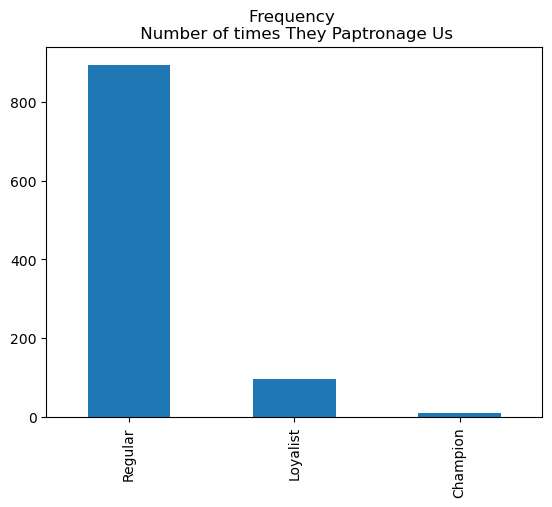

In [45]:
df['Freq_Score'].value_counts().plot(kind='bar',title='Frequency \n Number of times They Paptronage Us')

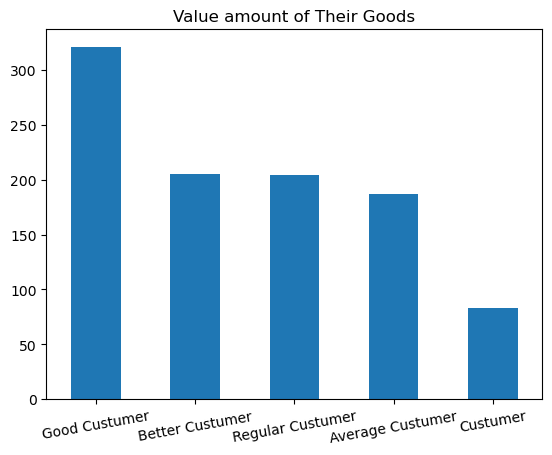

In [47]:
#their Tansaction score:

df['Transaction_Score'].value_counts().plot(kind='bar',title='Value amount of Their Goods')
plt.xticks(rotation=10);



In [48]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Moneytaryvalue,Recency_Score,Freq_Score,Transaction_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,101,1,943.31,1,Regular,Better Custumer
1,2188,2023-04-11,463.70,Product A,176819,London,101,1,463.70,1,Regular,Average Custumer
2,4608,2023-04-11,80.28,Product A,340062,New York,101,1,80.28,1,Regular,Custumer
3,2559,2023-04-11,221.29,Product A,239145,London,101,1,221.29,1,Regular,Regular Custumer
4,9482,2023-04-11,739.56,Product A,194545,Paris,101,1,739.56,1,Regular,Good Custumer


In [53]:
for i in df.columns:
    print('The count uniqueness of each Columns  {}: {}'.format(i,df[i].nunique()))

The count uniqueness of each Columns  CustomerID: 946
The count uniqueness of each Columns  PurchaseDate: 61
The count uniqueness of each Columns  TransactionAmount: 997
The count uniqueness of each Columns  ProductInformation: 4
The count uniqueness of each Columns  OrderID: 1000
The count uniqueness of each Columns  Location: 4
The count uniqueness of each Columns  Recency: 61
The count uniqueness of each Columns  Frequency: 3
The count uniqueness of each Columns  Moneytaryvalue: 944
The count uniqueness of each Columns  Recency_Score: 4
The count uniqueness of each Columns  Freq_Score: 3
The count uniqueness of each Columns  Transaction_Score: 5


In [56]:
df['Recency_Score'].unique()

array([1, 2, 3, 4], dtype=int64)

In [58]:
df.query('Recency_Score==1')

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Moneytaryvalue,Recency_Score,Freq_Score,Transaction_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,101,1,943.31,1,Regular,Better Custumer
1,2188,2023-04-11,463.70,Product A,176819,London,101,1,463.70,1,Regular,Average Custumer
2,4608,2023-04-11,80.28,Product A,340062,New York,101,1,80.28,1,Regular,Custumer
3,2559,2023-04-11,221.29,Product A,239145,London,101,1,221.29,1,Regular,Regular Custumer
4,9482,2023-04-11,739.56,Product A,194545,Paris,101,1,739.56,1,Regular,Good Custumer
5,8483,2023-04-11,375.23,Product C,691194,Paris,101,1,375.23,1,Regular,Average Custumer
6,8317,2023-04-11,272.56,Product B,826847,New York,101,2,974.88,1,Loyalist,Regular Custumer
7,6911,2023-04-11,433.33,Product C,963918,Tokyo,101,1,433.33,1,Regular,Average Custumer
8,8993,2023-04-12,16.55,Product D,112426,New York,100,1,16.55,1,Regular,Custumer
9,3519,2023-04-12,464.63,Product C,139726,New York,100,1,464.63,1,Regular,Average Custumer


So we been able to identify our Regular Custumer, and Loyalist custumers

Also we have been able to identify Custumer whose Transaction values are very high.

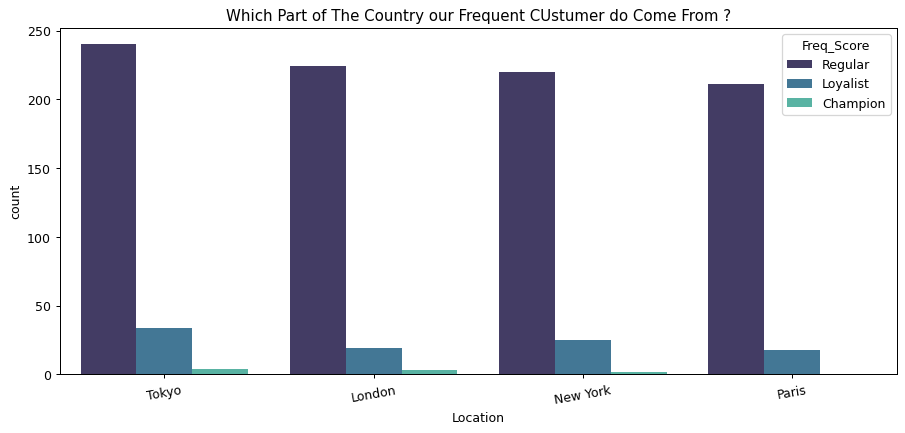

In [61]:
#Let Get to which part of the country They are from ?


plt.figure(figsize=(12,5),dpi=90)
sns.countplot(data=df,x='Location',hue='Freq_Score',palette='mako')
plt.title('Which Part of The Country our Frequent CUstumer do Come From ?')
plt.xticks(rotation=10);

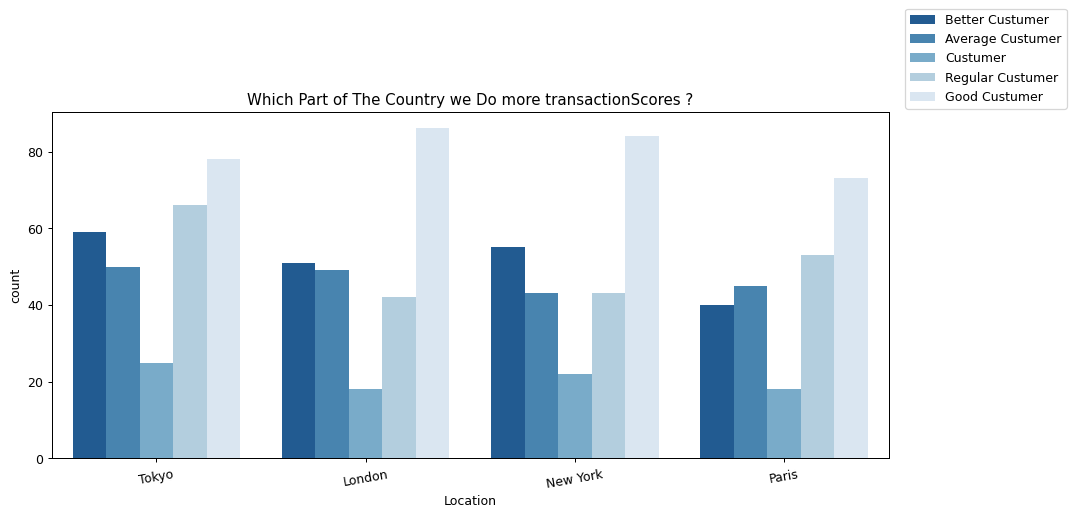

In [68]:


plt.figure(figsize=(12,5),dpi=90)
sns.countplot(data=df,x='Location',hue='Transaction_Score',palette='Blues_r')
plt.title('Which Part of The Country we Do more transactionScores ?')
plt.xticks(rotation=10);
plt.legend(loc=(1.02,1.01))

Insight:
    
    Customers are understood and segmented using RFM Analysis based on their purchasing habits. 
    Recency, frequency, and monetary value, or RFM, are three crucial measures that show how engaged, loyal, and valuable a         client is to a company.